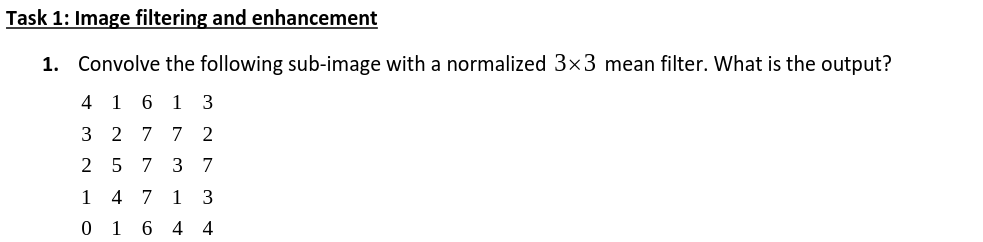

In [5]:

import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter,convolve,  gaussian_filter
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2 
import os 

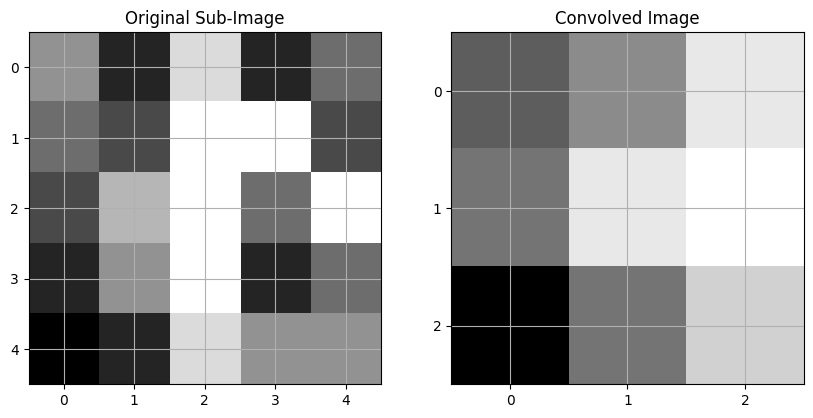

In [6]:
# Define the sub-image
sub_image = np.array([
    [4, 1, 6, 1, 3],
    [3, 2, 7, 7, 2],
    [2, 5, 7, 3, 7],
    [1, 4, 7, 1, 3],
    [0, 1, 6, 4, 4]
])

# Define the normalized 3x3 mean filter
mean_filter = np.ones((3, 3)) / 9

# Perform the convolution
output = convolve2d(sub_image, mean_filter, mode='valid')

# Plot the original and convolved images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original image
axs[0].imshow(sub_image, cmap='gray', interpolation='none')
axs[0].set_title('Original Sub-Image')
axs[0].set_xticks(np.arange(sub_image.shape[1]))
axs[0].set_yticks(np.arange(sub_image.shape[0]))
axs[0].grid(True)

# Plot the convolved image
axs[1].imshow(output, cmap='gray', interpolation='none')
axs[1].set_title('Convolved Image')
axs[1].set_xticks(np.arange(output.shape[1]))
axs[1].set_yticks(np.arange(output.shape[0]))
axs[1].grid(True)

plt.show()

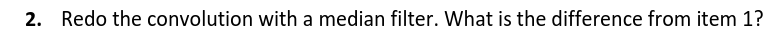

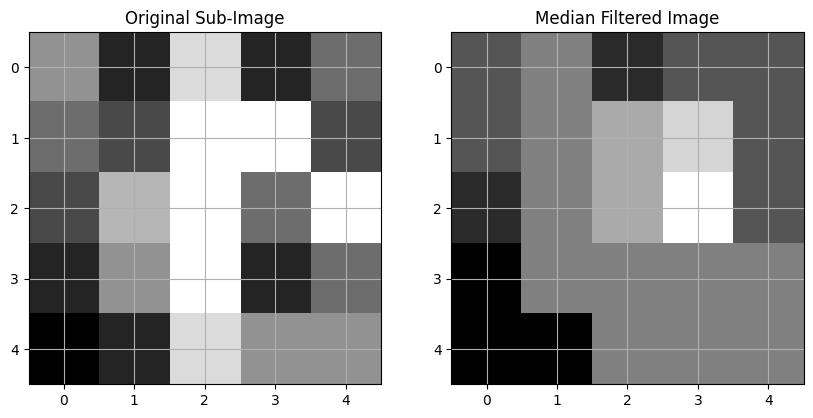

In [11]:
# Define the sub-image
sub_image = np.array([
    [4, 1, 6, 1, 3],
    [3, 2, 7, 7, 2],
    [2, 5, 7, 3, 7],
    [1, 4, 7, 1, 3],
    [0, 1, 6, 4, 4]
])

# Apply the 3x3 median filter
filtered_image = median_filter(sub_image, size=3)

# Plot the original and filtered images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original image
axs[0].imshow(sub_image, cmap='gray', interpolation='none')
axs[0].set_title('Original Sub-Image')
axs[0].set_xticks(np.arange(sub_image.shape[1]))
axs[0].set_yticks(np.arange(sub_image.shape[0]))
axs[0].grid(True)

# Plot the filtered image
axs[1].imshow(filtered_image, cmap='gray', interpolation='none')
axs[1].set_title('Median Filtered Image')
axs[1].set_xticks(np.arange(filtered_image.shape[1]))
axs[1].set_yticks(np.arange(filtered_image.shape[0]))
axs[1].grid(True)

plt.show()


    Mean Filter: Averages the values within the filter window, leading to a smoothing effect that can blur edges and reduce noise but may introduce averaging artifacts.
    Median Filter: Takes the median value within the filter window, preserving edges better and being more robust to outliers or impulse noise.

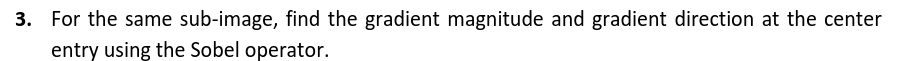

In [23]:
# Define the Sobel operators
sobel_x = 1/8 * np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y = sobel_x.T
# Apply the Sobel operators
Gx = convolve(sub_image, sobel_x)
Gy = convolve(sub_image, sobel_y)

# Calculate the gradient magnitude and direction at the center entry (position [2, 2])
center_x = Gx[2, 2]
center_y = Gy[2, 2]

gradient_magnitude = np.sqrt(center_x**2 + center_y**2)
gradient_direction = np.arctan2(center_y, center_x) * (180 / np.pi)  # Convert to degrees

# Print the results
print("Gradient in x-direction at the center:", center_x)
print("Gradient in y-direction at the center:", center_y)
print("Gradient magnitude at the center:", gradient_magnitude)
print("Gradient direction at the center (degrees):", gradient_direction)

Gradient in x-direction at the center: 2
Gradient in y-direction at the center: 4
Gradient magnitude at the center: 4.47213595499958
Gradient direction at the center (degrees): 63.43494882292201


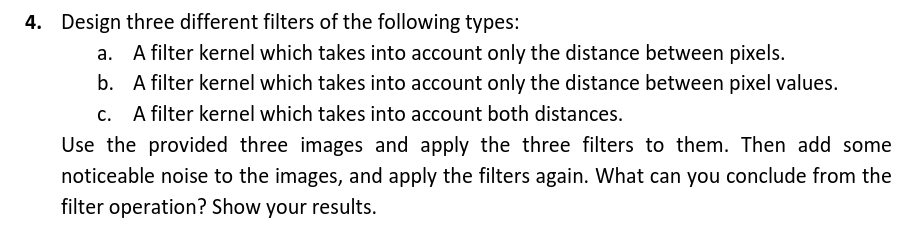

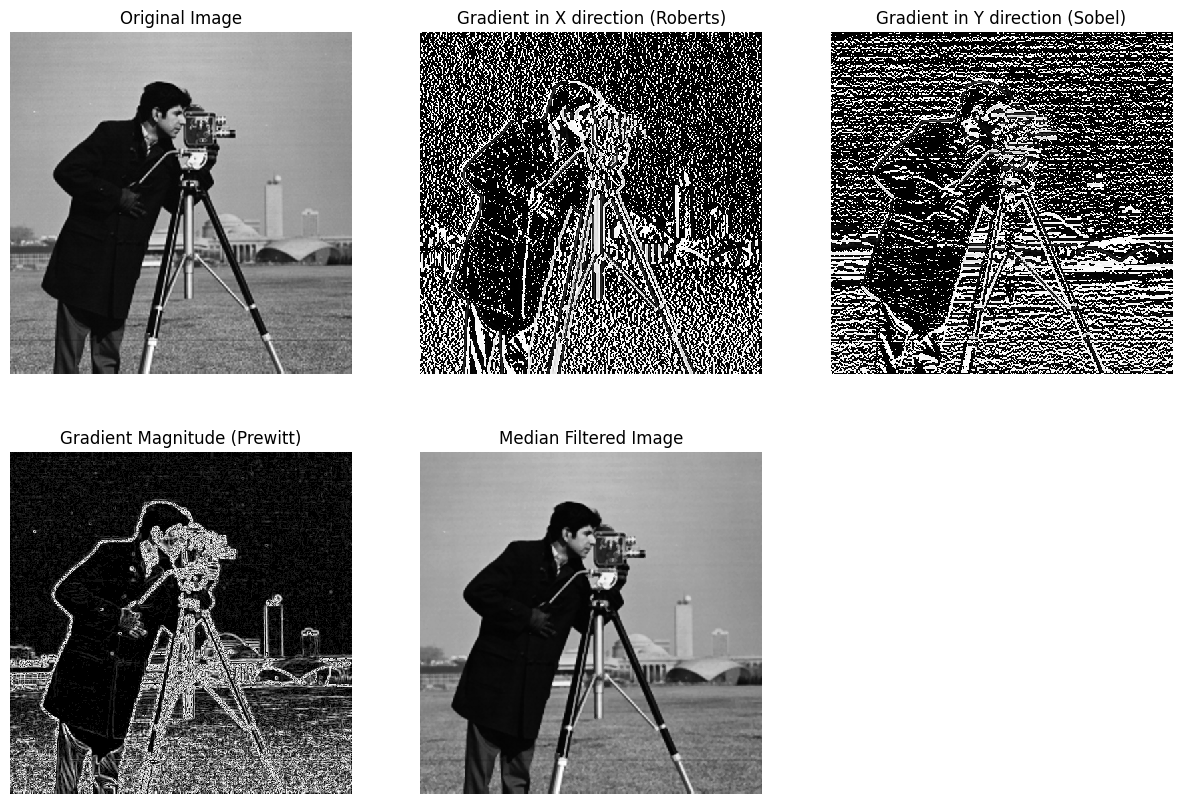

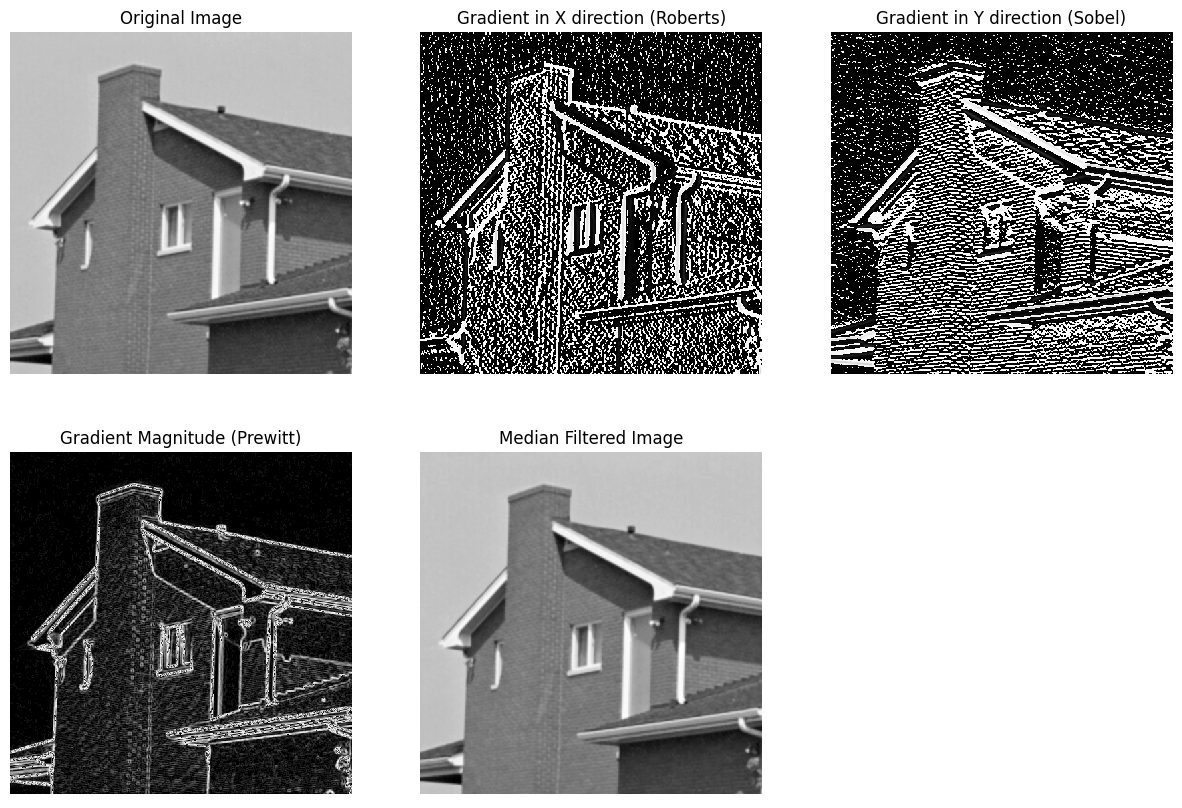

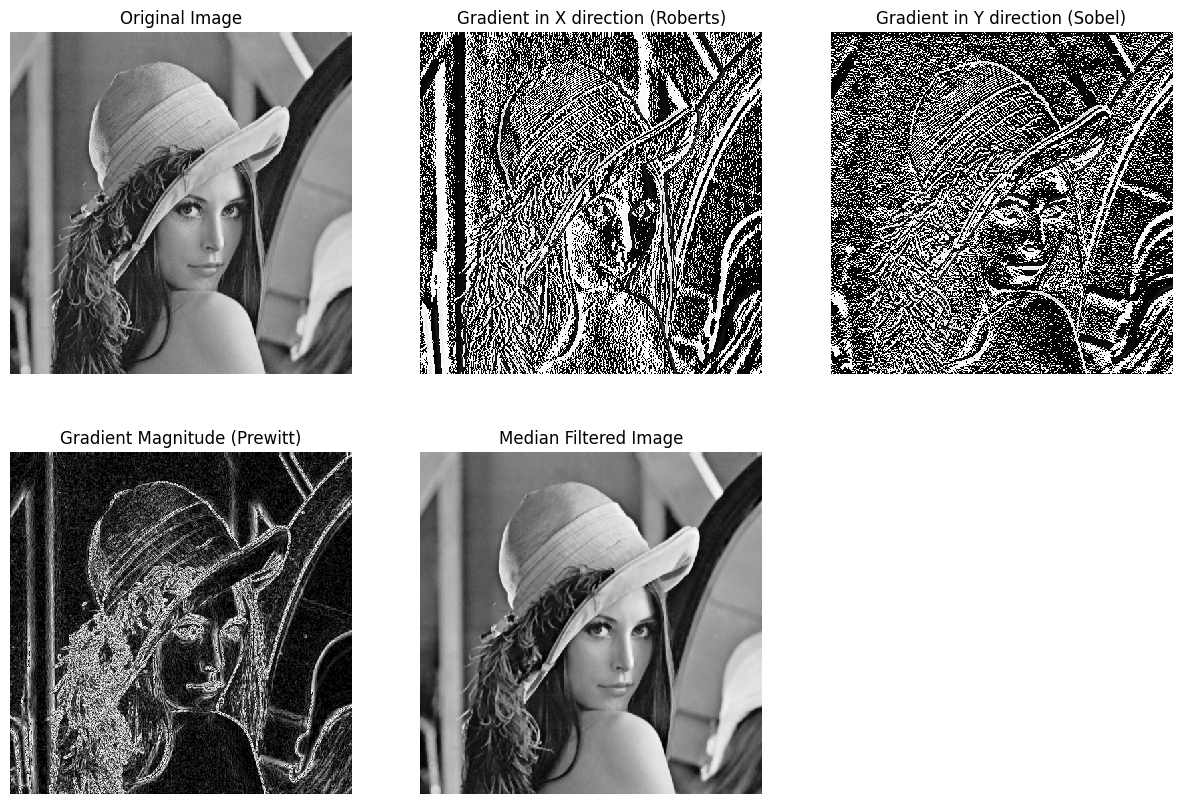

In [5]:

# Load the image
def load_image(image_path):
    return np.array(Image.open(image_path).convert('L'))

# Define filter kernels
robert_x = 1/2 * np.array([
    [ 0,  0,  0],
    [-1,  0,  1],
    [ 0,  0,  0]
])

sobel_y = robert_x.T

prewitt_x = 1/6 * np.array([
    [-1,  0,  1],
    [-1,  0,  1],
    [-1,  0,  1]
])

prewitt_y = prewitt_x.T

# Function to apply the filters
def apply_filters(image):
    Gx_roberts = convolve(image, robert_x)
    Gy_sobel = convolve(image, sobel_y)
    Gx_prewitt = convolve(image, prewitt_x)
    Gy_prewitt = convolve(image, prewitt_y)
    
    # Gradient magnitude for combined distances
    gradient_magnitude_prewitt = np.sqrt(Gx_prewitt**2 + Gy_prewitt**2)
    
    # Apply median filter
    median_filtered = median_filter(image, size=3)
    
    return Gx_roberts, Gy_sobel, gradient_magnitude_prewitt, median_filtered

# Plot the results
def plot_results(image, Gx_roberts, Gy_sobel, gradient_magnitude_prewitt, median_filtered):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    
    # Original image
    axs[0, 0].imshow(image, cmap='gray', interpolation='none')
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')
    
    # Gradient in x-direction (Roberts)
    axs[0, 1].imshow(Gx_roberts, cmap='gray', interpolation='none')
    axs[0, 1].set_title('Gradient in X direction (Roberts)')
    axs[0, 1].axis('off')
    
    # Gradient in y-direction (Sobel)
    axs[0, 2].imshow(Gy_sobel, cmap='gray', interpolation='none')
    axs[0, 2].set_title('Gradient in Y direction (Sobel)')
    axs[0, 2].axis('off')
    
    # Gradient magnitude (Prewitt)
    axs[1, 0].imshow(gradient_magnitude_prewitt, cmap='gray', interpolation='none')
    axs[1, 0].set_title('Gradient Magnitude (Prewitt)')
    axs[1, 0].axis('off')
    
    # Median filtered image
    axs[1, 1].imshow(median_filtered, cmap='gray', interpolation='none')
    axs[1, 1].set_title('Median Filtered Image')
    axs[1, 1].axis('off')
    
    # Hide the empty subplot
    axs[1, 2].axis('off')
    
    plt.show()

# Load the image
for img_path in ['./images/Task1/cameraman.jpg', './images/Task1/house.jpg', './images/Task1/lena.jpg'] :
    image = load_image(img_path)

    # Apply filters
    Gx_roberts, Gy_sobel, gradient_magnitude_prewitt, median_filtered = apply_filters(image)

    # Plot results
    plot_results(image, Gx_roberts, Gy_sobel, gradient_magnitude_prewitt, median_filtered)

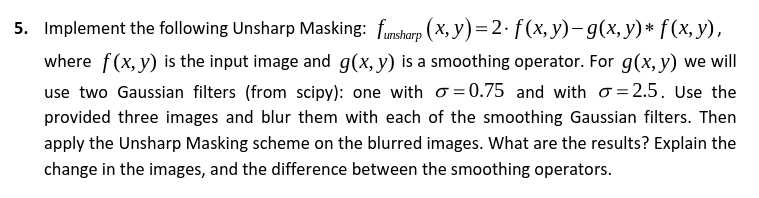

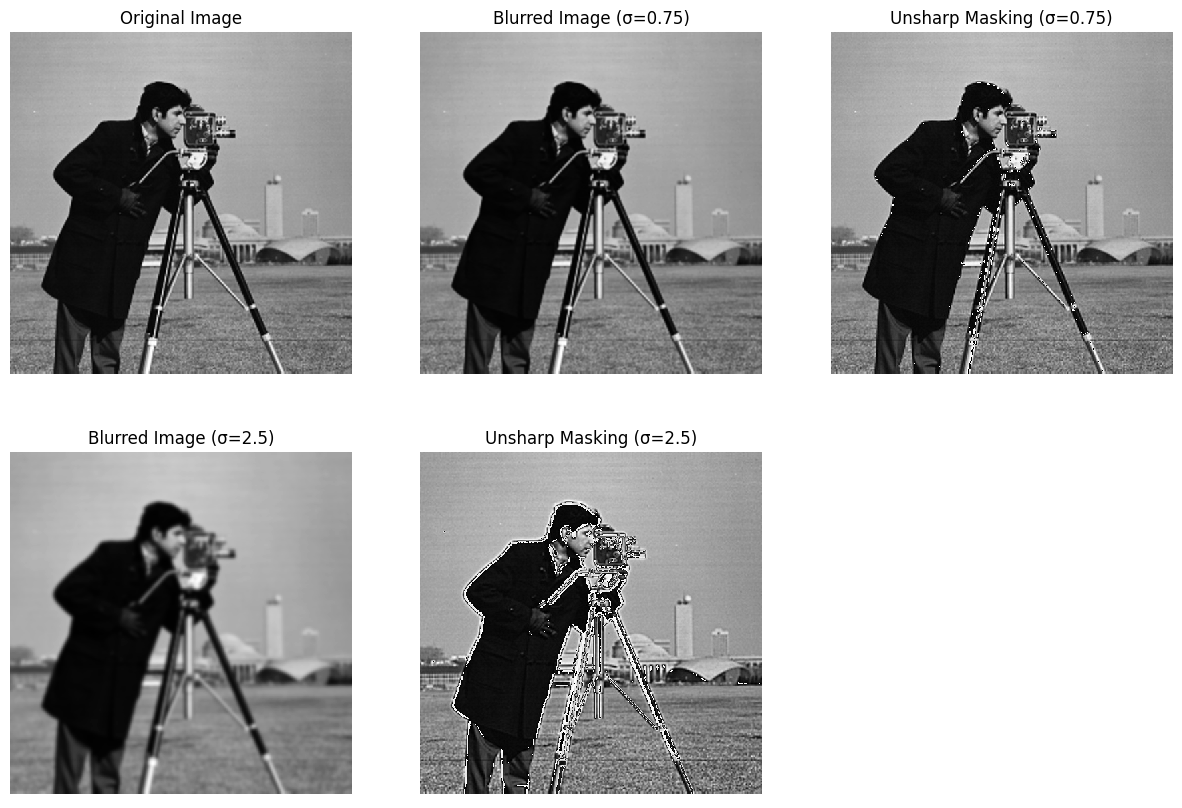

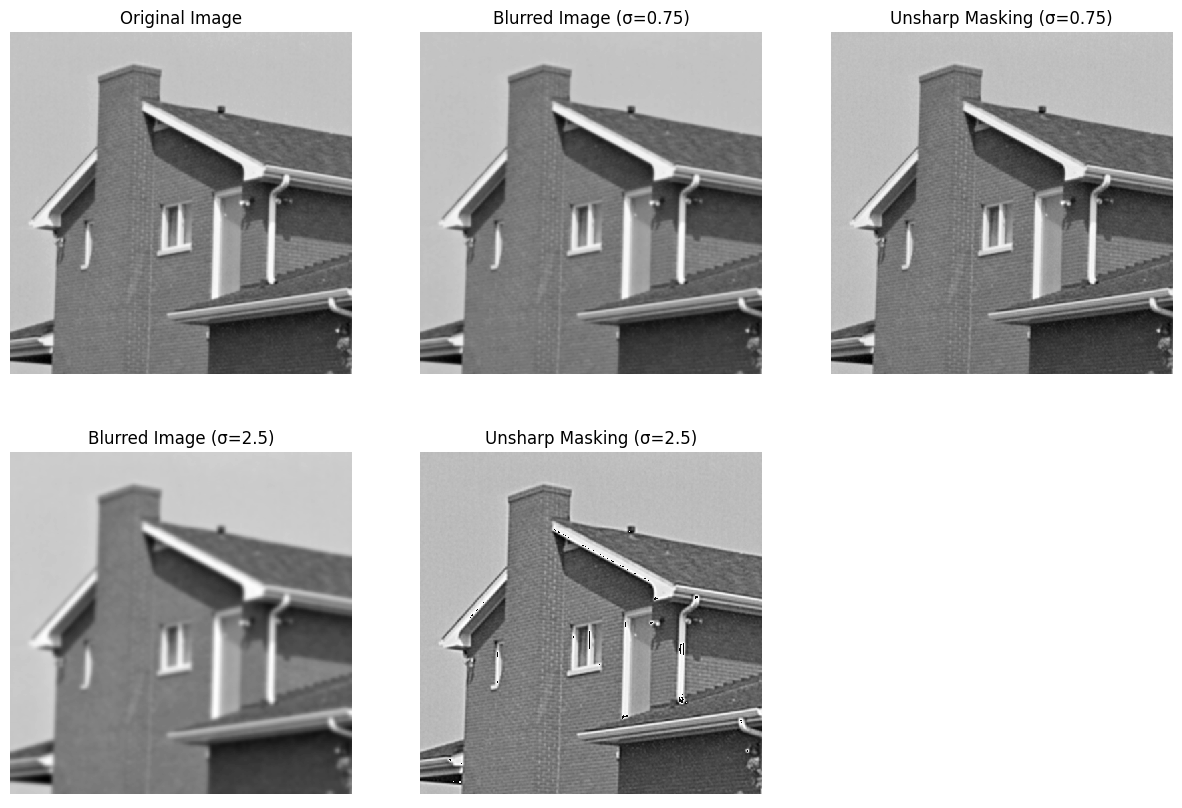

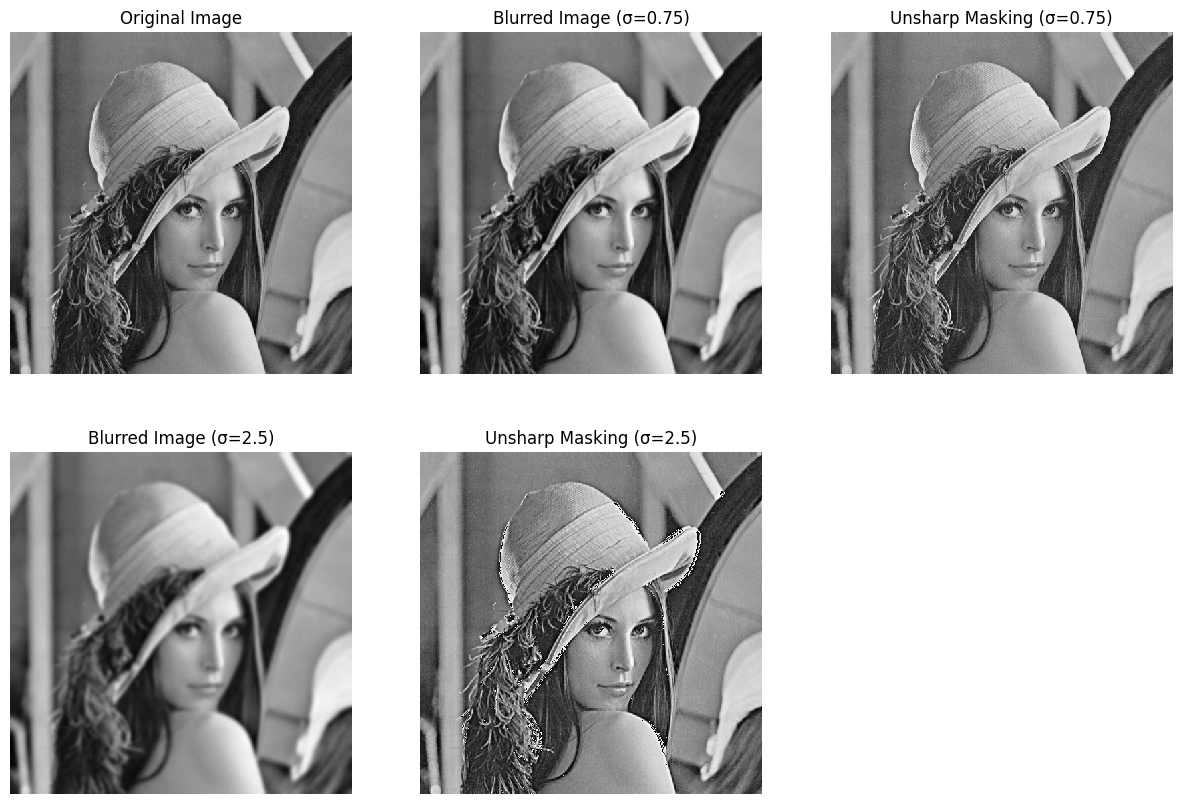

In [15]:
# Load images
def load_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    return np.array(img)

# Unsharp Masking function
def unsharp_masking(image, sigma, k=1):
    blurred_image = gaussian_filter(image, sigma=sigma)
    return 2*image - blurred_image

# Function to plot results
def plot_results(original, blurred_075, unsharp_075, blurred_25, unsharp_25):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    
    # Original image
    axs[0, 0].imshow(original, cmap='gray', interpolation='none')
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')
    
    # Blurred with sigma=0.75
    axs[0, 1].imshow(blurred_075, cmap='gray', interpolation='none')
    axs[0, 1].set_title('Blurred Image (σ=0.75)')
    axs[0, 1].axis('off')
    
    # Unsharp masking with sigma=0.75
    axs[0, 2].imshow(unsharp_075, cmap='gray', interpolation='none')
    axs[0, 2].set_title('Unsharp Masking (σ=0.75)')
    axs[0, 2].axis('off')
    
    # Blurred with sigma=2.5
    axs[1, 0].imshow(blurred_25, cmap='gray', interpolation='none')
    axs[1, 0].set_title('Blurred Image (σ=2.5)')
    axs[1, 0].axis('off')
    
    # Unsharp masking with sigma=2.5
    axs[1, 1].imshow(unsharp_25, cmap='gray', interpolation='none')
    axs[1, 1].set_title('Unsharp Masking (σ=2.5)')
    axs[1, 1].axis('off')
    
    # Hide the empty subplot
    axs[1, 2].axis('off')
    
    plt.show()

# Load images
image_paths = ['./Images/Task1/cameraman.jpg', './Images/Task1/house.jpg', './Images/Task1/lena.jpg']
images = [load_image(image_path) for image_path in image_paths]

# Apply Gaussian blur and unsharp masking
results = []
for image in images:
    blurred_075 = gaussian_filter(image, sigma=0.75)
    unsharp_075 = unsharp_masking(image, sigma=0.75)
    blurred_25 = gaussian_filter(image, sigma=2.5)
    unsharp_25 = unsharp_masking(image, sigma=2.5)
    results.append((image, blurred_075, unsharp_075, blurred_25, unsharp_25))

# Plot results for each image
for result in results:
    plot_results(*result)

### Analysis of Results

Let's explain the changes in the images and the differences between the smoothing operators used in unsharp masking.

#### Changes in the Images:
1. **Original Image**:
   - This is the unaltered image, serving as the baseline for comparison.

2. **Blurred Image (σ=0.75)**:
   - Smoothing with a Gaussian filter with \(\sigma = 0.75\) results in a slightly blurred image. The edges and details are softened, but the overall structure of the image remains fairly recognizable. This level of smoothing retains more high-frequency information compared to a higher \(\sigma\).

3. **Unsharp Masking (σ=0.75)**:
   - Applying unsharp masking with \(\sigma = 0.75\) enhances the edges and details in the image. The image appears sharper compared to the original because the subtraction of the slightly blurred image (σ=0.75) from the original image accentuates the high-frequency components (edges). The effect is noticeable but not overly aggressive, providing a balanced enhancement.

4. **Blurred Image (σ=2.5)**:
   - Smoothing with a Gaussian filter with \(\sigma = 2.5\) results in a significantly blurred image. The edges and fine details are much more softened compared to the \(\sigma = 0.75\) case. The overall image appears more blurred, and the distinction between different regions becomes less sharp.

5. **Unsharp Masking (σ=2.5)**:
   - Applying unsharp masking with \(\sigma = 2.5\) results in a more pronounced sharpening effect compared to \(\sigma = 0.75\). Since the blurred image is much softer, subtracting it from the original image amplifies the high-frequency components (edges) more aggressively. This can make the edges appear more distinct and can enhance texture details significantly, but it may also introduce artifacts if overdone.

#### Difference Between Smoothing Operators:
1. **Gaussian Blur with σ=0.75**:
   - This level of Gaussian blur performs light smoothing, which primarily affects the very fine details and noise in the image. The resulting blurred image retains much of the original structure and edges, leading to a more subtle enhancement when used in unsharp masking. This is suitable for scenarios where a mild sharpening is desired without drastically altering the overall appearance of the image.

2. **Gaussian Blur with σ=2.5**:
   - This level of Gaussian blur performs heavier smoothing, which significantly affects the edges and fine details. The resulting blurred image is much softer, with prominent edges and features considerably diffused. When used in unsharp masking, this leads to a more aggressive sharpening effect, highlighting edges and texture more intensely. This can be useful in situations where strong edge enhancement is needed, but care must be taken to avoid excessive sharpening that can result in unnatural-looking images or artifacts.

### Summary:
- **Unsharp Masking with σ=0.75**: Provides a balanced sharpening effect by enhancing edges and details moderately. It is useful for general image enhancement without introducing significant artifacts.
- **Unsharp Masking with σ=2.5**: Offers a stronger sharpening effect due to the higher level of initial smoothing. It accentuates edges and texture more aggressively, which can be useful for highlighting specific features but may also introduce artifacts if overdone.

The choice of \(\sigma\) for Gaussian smoothing in unsharp masking depends on the desired level of sharpness and the specific requirements of the image enhancement task.